<a href="https://colab.research.google.com/github/singhnidh/machine-learning-lab/blob/main/PCA_ON_MINST_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nidhisingh51","key":"094568e510302efb329296635d34583f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          24089        676  1.0              
mauryansshivam/netflix-ott-revenue-and-subscribers-csv-file           Netflix OTT Revenue and Subscribers (CSV File)        2KB  2023-05-13 17:40:23           1512         35  1.0              
darshanprabhu09/stock-prices-for                                      Stock prices of Amazon , Microsoft , Google, Apple   85KB  2023-05-16 15:17:16           1350         34  1.0              
fatihb/coffee-quality-data-cqi

In [ ]:
! kaggle datasets download -d oddrationale/mnist-in-csv

 20% 3.00M/15.2M [00:00<00:00, 26.7MB/s]
100% 15.2M/15.2M [00:00<00:00, 73.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras import backend as K

In [ ]:
! mkdir train
! unzip /content/mnist-in-csv.zip -d train

mkdir: cannot create directory ‘train’: File exists
Archive:  /content/mnist-in-csv.zip
  inflating: train/mnist_test.csv    
  inflating: train/mnist_train.csv   


In [ ]:
# Reading the Train and Test Datasets.
mnist_train = pd.read_csv("/content/train/mnist_train.csv")
mnist_test = pd.read_csv("/content/train/mnist_test.csv")

In [ ]:
# Let's see the shape of the train and test data
print(mnist_train.shape, mnist_test.shape)


(60000, 785) (10000, 785)


In [ ]:
# Looking at a few rows.
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# The basic statistical insights of the numerical features of train data.
mnist_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


**Data Cleaning and Normalization**

In [ ]:
mnist_train.isna().any().any()

False

**Data Normalization**

In [ ]:
label=mnist_train['label'] # save label data for later use
mnist_train.drop('label', axis = 1, inplace = True)

In [ ]:
# converting in 0 & 1

from sklearn.preprocessing import StandardScaler
mnist_train_standardized = StandardScaler().fit_transform(mnist_train)

In [ ]:
covMatrix = np.matmul(mnist_train_standardized.T ,mnist_train_standardized) # matrix multiplication in numpy

**Calculating Eigeon Values and Eigeon vectors**

In [ ]:
from scipy.linalg import eigh
values, vector = eigh(covMatrix,eigvals=(782,783))
values

<ipython-input-16-fd48076340ce>:2: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  values, vector = eigh(covMatrix,eigvals=(782,783))


array([1754472.60943943, 2429217.61887289])

**Transpose the eigeon vector**

In [ ]:
print("The shape before",vector.shape)
vector=vector.T
print("The new shape",vector.shape)

The shape before (784, 2)
The new shape (2, 784)


**Rriginal data on the vector plane formed using vector multiplication.**

In [ ]:
projectedData = np.matmul(vector, mnist_train_standardized.T)

**Final dataframe for Visualization**

In [ ]:
reducedData = np.vstack((projectedData, label)).T #Stack with labels
reducedData = pd.DataFrame(reducedData, columns = ['pca_1', 'pca_2', 'label'])
print(reducedData)
reducedData.describe()

          pca_1     pca_2  label
0     -4.814790 -0.922159    5.0
1     -7.754403  8.708977    0.0
2      9.431338  2.328389    4.0
3     -3.746318 -6.582173    1.0
4      3.133297 -5.183251    9.0
...         ...       ...    ...
59995 -5.119129 -2.039339    8.0
59996 -6.498440  0.607841    3.0
59997 -3.230564 -3.777212    5.0
59998 -4.948125  1.722369    6.0
59999 -6.175386 -1.427251    8.0

[60000 rows x 3 columns]


,pca_1,pca_2,label
count,6.000000e+04,6.000000e+04,60000.000000
mean,6.063298e-17,-3.211653e-16,4.453933
std,5.407559e+00,6.362989e+00,2.889270
min,-1.778480e+01,-9.368219e+00,0.000000
25%,-3.430592e+00,-4.682982e+00,2.000000
50%,-4.690500e-01,-1.363513e+00,4.000000
75%,3.257416e+00,3.160637e+00,7.000000
max,2.811128e+01,3.222950e+01,9.000000


**Plot the data**

In [ ]:
sns.set_style("darkgrid")

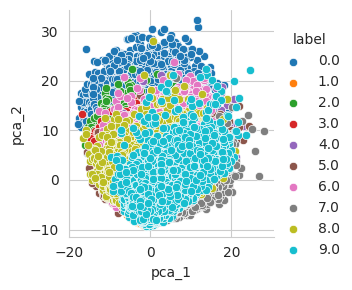

In [ ]:
sns.FacetGrid(reducedData, hue = 'label') \
  .map(sns.scatterplot, 'pca_1', 'pca_2') \
  .add_legend()

**Testing data**

In [ ]:
def mnist_train(return_models):
    models = return_models
    for model in models:
        print("Checking for " + str(model.__class__.__name__))

        result_digit = model.predict(np.array(mnist_train).reshape(1, -1))
        check.equal(result_digit)
        print(result_digit)